In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
# ignore warning messeges
import warnings
warnings.filterwarnings('ignore')

## Importing Data

### Train data

In [13]:
train16 = pd.read_csv('train_2016_v2.csv')
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [14]:
train17 = pd.read_csv('train_2017.csv')
train17.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [15]:
print("shape of train16: ",train16.shape)
print("shape of train17: ",train17.shape)

shape of train16:  (90275, 3)
shape of train17:  (77613, 3)


### Properties Data

In [19]:
prop16 = pd.read_csv('properties_2016.csv')
prop16.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
prop17 = pd.read_csv('properties_2017.csv')
prop17.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print("shape of prop16: ", prop16.shape)
print("shape of prop17: ", prop17.shape)

shape of prop16:  (2985217, 58)
shape of prop17:  (2985217, 58)


#### prop16과 prop17의 parcelid 비교
- 두 데이터는 서로 동일한 집에 대한 데이터들을 담고 있음

In [22]:
# prop16과 prop17의 parcelid를 합쳤을 때 개수를 확인
id16 = prop16["parcelid"].rename(columns={"parcelid":"2016"})
id17 = prop16["parcelid"].rename(columns={"parcelid":"2017"})
id = pd.concat([id16, id17], axis=1, join='inner') 
print("shape of id: ", id.shape)
id[0][id[0]!=id[1]]    # 2016과 2017이 다를 때로 filtering

shape of id:  (2985217, 2)


Series([], Name: 0, dtype: int64)

#### train & properties merge

In [40]:
# traing16을 기준으로 prop16을 merge
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")
merged16.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [27]:
# traing17을 기준으로 prop17을 merge
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")
merged17.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


#### EDA를 하기 위해 하나의 dataset으로 만들어줌
- merged16과 merge17을 위아래로 연결
- 거래마다의 logerror에 대해 properties data를 붙인 것

In [43]:
# merged16과 merged17의 parcelid는 단 하나의 값도 동일하지 않음 
len([i for i in merged16.parcelid if i in merged17.parcelid])

0

In [46]:
merged = pd.concat([merged16, merged17]).reset_index(drop=True)
merged.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [47]:
print("shape of merged: ", merged.shape)

shape of merged:  (167888, 60)


#### **comment**
- data merge 결과 2016년 & 2017년의 167,888건의 거래에 대해 parcelid 포함 60개 변수를 가진 data가 만들어짐
- 변수: logerror, 거래날짜, properties data(해당 거래 년도의 data)

# EDA

### 1) Transactions

#### 집들은 몇번씩 거래되었는가?
- 대부분의 집들은 한번씩 거래됨
- unique한 parcelid의 개수는 165210개
- Q: properties data는 거래 횟수에 따라 중복되어 들어간 경우가 있는데, EDA를 그대로 해도 괜찮을지?

In [58]:
count = pd.DataFrame(columns=['count_all', 'count_2016', 'count_2017'])
count['count_all'] = (merged['parcelid'].value_counts()).value_counts()
count['count_2016'] = (merged16['parcelid'].value_counts()).value_counts()
count['count_2017'] = (merged17['parcelid'].value_counts()).value_counts()
count

,count_all,count_2016,count_2017
1,162541,90026,77218
2,2660,123,193
3,9,1,3


In [59]:
len(list(merged["parcelid"].unique()))

165210

## 면적 관련 변수
### ~~finishedfloor1squarefeet~~
- Size of the finished living area on the first (entry) floor of the
- 주택 1층 생활 공간의 규모

In [174]:
merged['finishedfloor1squarefeet'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: finishedfloor1squarefeet, dtype: float64

In [72]:
merged["finishedfloor1squarefeet"].shape

(167888,)

In [93]:
# MV count
merged["finishedfloor1squarefeet"].isnull().sum()

154995

In [98]:
# not MV count
merged["finishedfloor1squarefeet"].shape[0] \
- merged["finishedfloor1squarefeet"].isnull().sum()

12893

In [75]:
# MV ratio
merged["finishedfloor1squarefeet"].isnull().sum() \
/ merged["finishedfloor1squarefeet"].shape[0]

0.92320475555131998

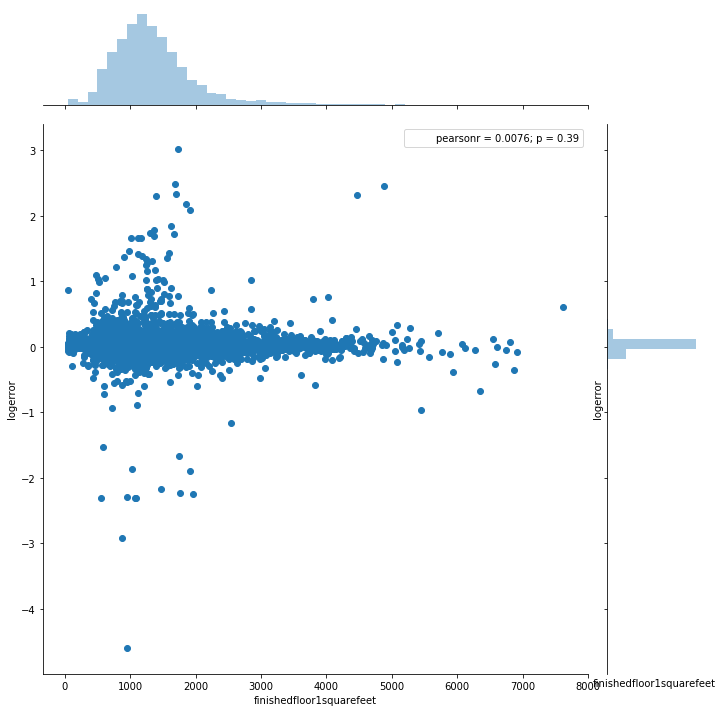

In [81]:
sns.jointplot(x =merged.finishedfloor1squarefeet,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedfloor1squarefeet")
plt.ylabel("logerror")
plt.show()

- finishedfloor1squarefeet이 증가 할 수록 logerror를 잘 예측하는 경향이 거의 무의미한 수준으로 있다고 보여짐
- 하지만 MV가 너무 많아 의심의 여지가 많음

### calculatedfinishedsquarefeet
- Calculated total finished living area of the home 
- 가정의 (마감)완료된 총 거주 면적

In [173]:
merged['calculatedfinishedsquarefeet'].head()

0    1684.0
1    2263.0
2    2217.0
3     839.0
4    2283.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [77]:
merged['calculatedfinishedsquarefeet'].shape

(167888,)

In [91]:
# MV count
merged['calculatedfinishedsquarefeet'].isnull().sum()

896

In [97]:
# not MV count
merged['calculatedfinishedsquarefeet'].shape[0] \
- merged['calculatedfinishedsquarefeet'].isnull().sum()

166992

In [79]:
# MV ratio
merged['calculatedfinishedsquarefeet'].isnull().sum() \
/ merged['calculatedfinishedsquarefeet'].shape[0]

0.0053368912608405599

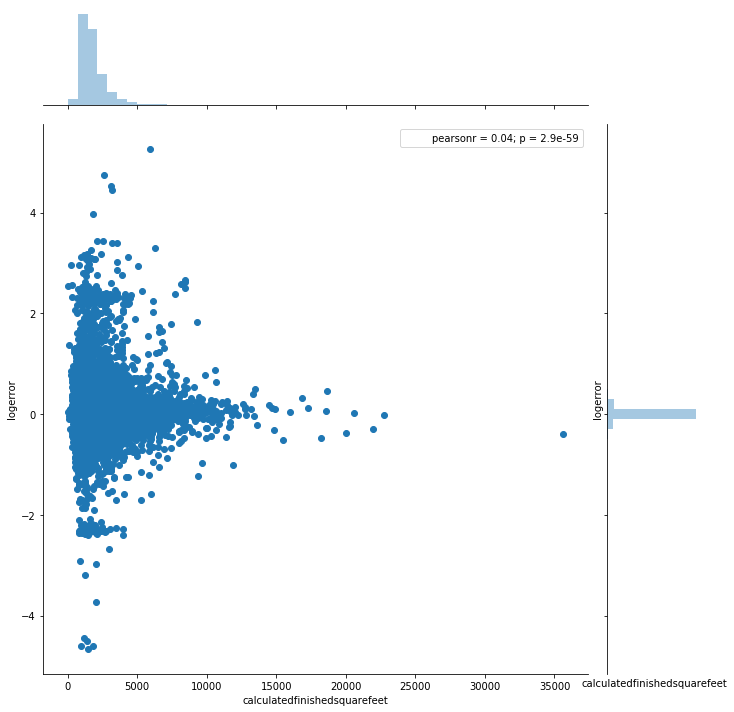

In [80]:
sns.jointplot(x =merged.calculatedfinishedsquarefeet,\
              y =merged.logerror,\
              size=10)
plt.xlabel("calculatedfinishedsquarefeet")
plt.ylabel("logerror")
plt.show()

- 오호 calculatedfinishedsquarefeet이 커질 수록 logerror를 더 잘 예측하는 경향이 강하다
- MV도 매우 적으므로 굉장히 유의미한 피처가 될 듯

### ~~finishedsquarefeet6~~
- Base unfinished and finished area
- 기본 완료 및 완료되지 않은 영역

In [175]:
merged['finishedsquarefeet6'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: finishedsquarefeet6, dtype: float64

In [82]:
merged['finishedsquarefeet6'].shape

(167888,)

In [86]:
# MV count
merged['finishedsquarefeet6'].isnull().sum()

167081

In [99]:
# not MV count
merged['finishedsquarefeet6'].shape[0] \
- merged['finishedsquarefeet6'].isnull().sum()

807

In [100]:
# MV ratio
merged['finishedsquarefeet6'].isnull().sum() \
/ merged['finishedsquarefeet6'].shape[0]

0.99519322405413135

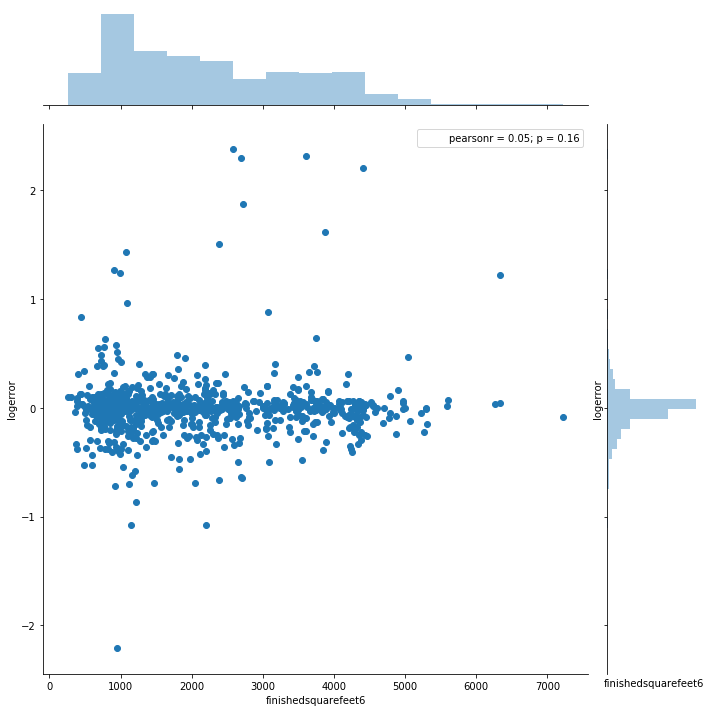

In [101]:
sns.jointplot(x =merged.finishedsquarefeet6,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedsquarefeet6")
plt.ylabel("logerror")
plt.show()

- 일단 MV도 99.5%이고 그래프 상으로도 finishedsquarefeet6는 logerror를 예측하는데 도움되지 않을듯

### finishedsquarefeet12
- Finished living area
- (마감)완료된 생활 공간

In [176]:
merged['finishedsquarefeet12'].head(5)

0    1684.0
1    2263.0
2    2217.0
3     839.0
4    2283.0
Name: finishedsquarefeet12, dtype: float64

In [102]:
merged['finishedsquarefeet12'].shape

(167888,)

In [103]:
# MV count
merged['finishedsquarefeet12'].isnull().sum()

8369

In [104]:
# not MV count
merged['finishedsquarefeet12'].shape[0] \
- merged['finishedsquarefeet12'].isnull().sum()

159519

In [105]:
# MV ratio
merged['finishedsquarefeet12'].isnull().sum() \
/ merged['finishedsquarefeet12'].shape[0]

0.049848708662918136

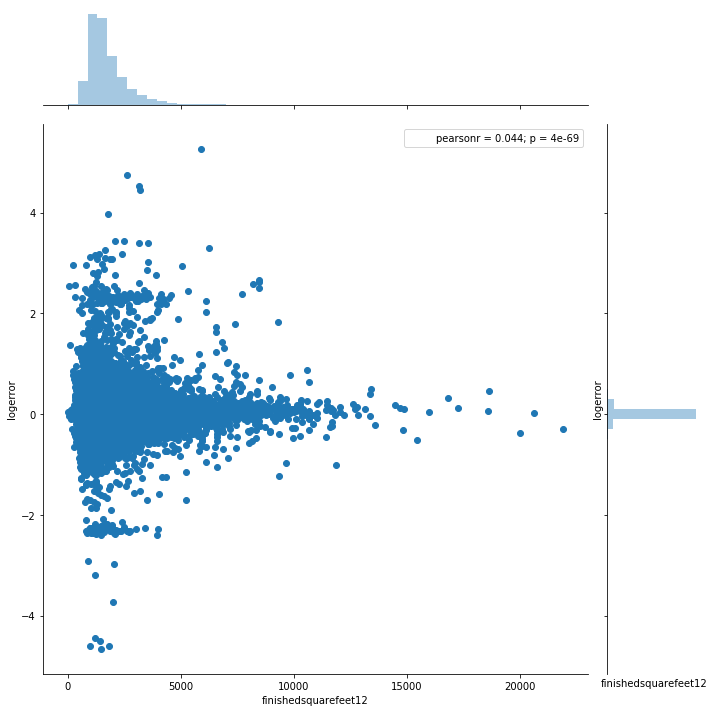

In [106]:
sns.jointplot(x =merged.finishedsquarefeet12,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedsquarefeet12")
plt.ylabel("logerror")
plt.show()

- finishedsquarefeet12이 증가할 수록 logerror가 줄어드는 경향이 눈에띈다. 매우 유의미
- MV 비율도 약 5%밖에 되지 않음

### ~~finishedsquarefeet13~~
- Perimeter  living area
- 주변 생활 지역

In [177]:
merged['finishedsquarefeet13'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: finishedsquarefeet13, dtype: float64

In [108]:
merged['finishedsquarefeet13'].shape

(167888,)

In [109]:
# MV count
merged['finishedsquarefeet13'].isnull().sum()

167813

In [110]:
# not MV count
merged['finishedsquarefeet13'].shape[0] \
- merged['finishedsquarefeet13'].isnull().sum()

75

In [111]:
# MV ratio
merged['finishedsquarefeet13'].isnull().sum() \
/ merged['finishedsquarefeet13'].shape[0]

0.99955327361097879

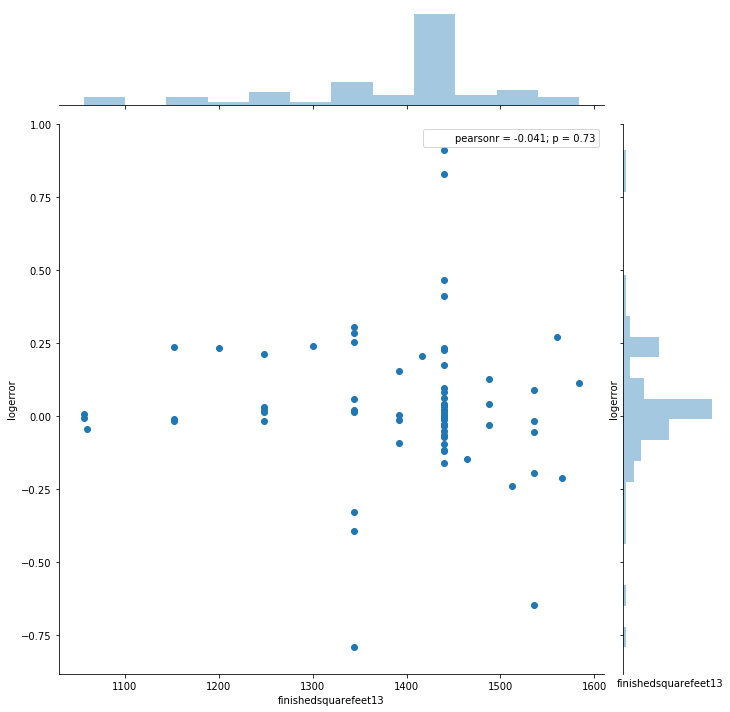

In [112]:
sns.jointplot(x =merged.finishedsquarefeet13,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedsquarefeet13")
plt.ylabel("logerror")
plt.show()

- 걍 무시

### ~~finishedsquarefeet15~~
- Total area
- 총 면적

In [178]:
merged['finishedsquarefeet15'].head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: finishedsquarefeet15, dtype: float64

In [118]:
merged['finishedsquarefeet15'].shape

(167888,)

In [119]:
# MV count
merged['finishedsquarefeet15'].isnull().sum()

161297

In [120]:
# not MV count
merged['finishedsquarefeet15'].shape[0] \
- merged['finishedsquarefeet15'].isnull().sum()

6591

In [121]:
# MV ratio
merged['finishedsquarefeet15'].isnull().sum() \
/ merged['finishedsquarefeet15'].shape[0]

0.96074168493281231

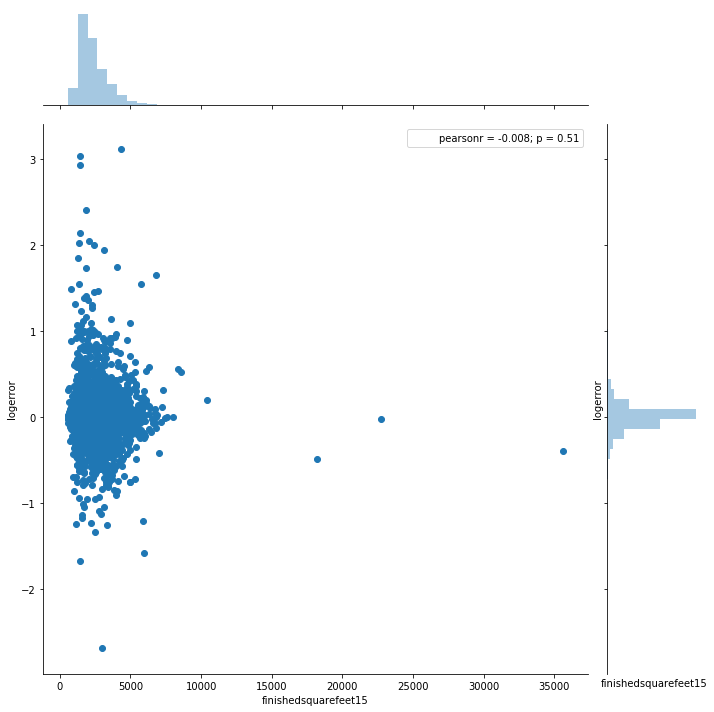

In [122]:
sns.jointplot(x =merged.finishedsquarefeet15,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedsquarefeet15")
plt.ylabel("logerror")
plt.show()

- 걍 무시

### ~~finishedsquarefeet50~~
- Size of the finished living area on the first (entry) floor of the home
- 주택 1층 생활 공간의 규모

In [179]:
merged['finishedsquarefeet50'].head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: finishedsquarefeet50, dtype: float64

In [123]:
merged['finishedsquarefeet50'].shape

(167888,)

In [124]:
# MV count
merged['finishedsquarefeet50'].isnull().sum()

154995

In [125]:
# not MV count
merged['finishedsquarefeet50'].shape[0] \
- merged['finishedsquarefeet50'].isnull().sum()

12893

In [126]:
# MV ratio
merged['finishedsquarefeet50'].isnull().sum() \
/ merged['finishedsquarefeet50'].shape[0]

0.92320475555131998

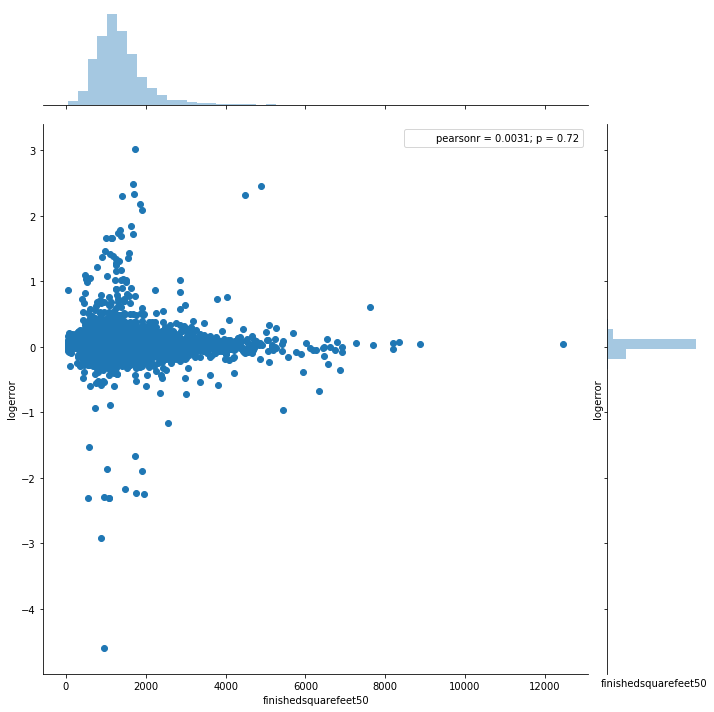

In [127]:
sns.jointplot(x =merged.finishedsquarefeet50,\
              y =merged.logerror,\
              size=10)
plt.xlabel("finishedsquarefeet50")
plt.ylabel("logerror")
plt.show()

- 음.. 그래프를 봤을때는 약간의 유의미를 찾을 수 있을 거 같긴한데 MV가 92%로 워낙 많아 패스

### ~~yardbuildingsqft17~~
- Patio in  yard
- 마당의 파티오(보통 집 뒤쪽에 만드는 테라스)

In [181]:
merged['yardbuildingsqft17'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: yardbuildingsqft17, dtype: float64

In [134]:
merged['yardbuildingsqft17'].shape

(167888,)

In [135]:
# MV count
merged['yardbuildingsqft17'].isnull().sum()

162849

In [136]:
# not MV count
merged['yardbuildingsqft17'].shape[0] \
- merged['yardbuildingsqft17'].isnull().sum()

5039

In [137]:
# MV ratio
merged['yardbuildingsqft17'].isnull().sum() \
/ merged['yardbuildingsqft17'].shape[0]

0.96998594300962548

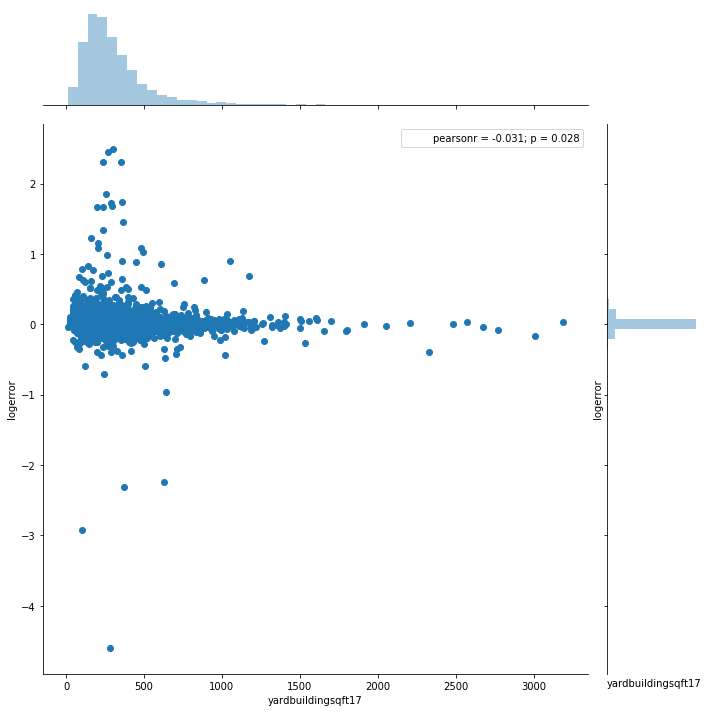

In [138]:
sns.jointplot(x =merged.yardbuildingsqft17,\
              y =merged.logerror,\
              size=10)
plt.xlabel("yardbuildingsqft17")
plt.ylabel("logerror")
plt.show()

- MV가 약 97%로 매우 많기는 하나 그래도 약간의 의미가 있는듯
- 만약 데이터가 많았다면 큰 의미가 있었을 수도

### ~~yardbuildingsqft26~~
- Storage shed/building in yard
- 마당의 저장 창고

In [182]:
merged['yardbuildingsqft26'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: yardbuildingsqft26, dtype: float64

In [142]:
merged['yardbuildingsqft26'].shape

(167888,)

In [143]:
# MV count
merged['yardbuildingsqft26'].isnull().sum()

167723

In [144]:
# not MV count
merged['yardbuildingsqft26'].shape[0] \
- merged['yardbuildingsqft26'].isnull().sum()

165

In [145]:
# MV ratio
merged['yardbuildingsqft26'].isnull().sum() \
/ merged['yardbuildingsqft26'].shape[0]

0.99901720194415322

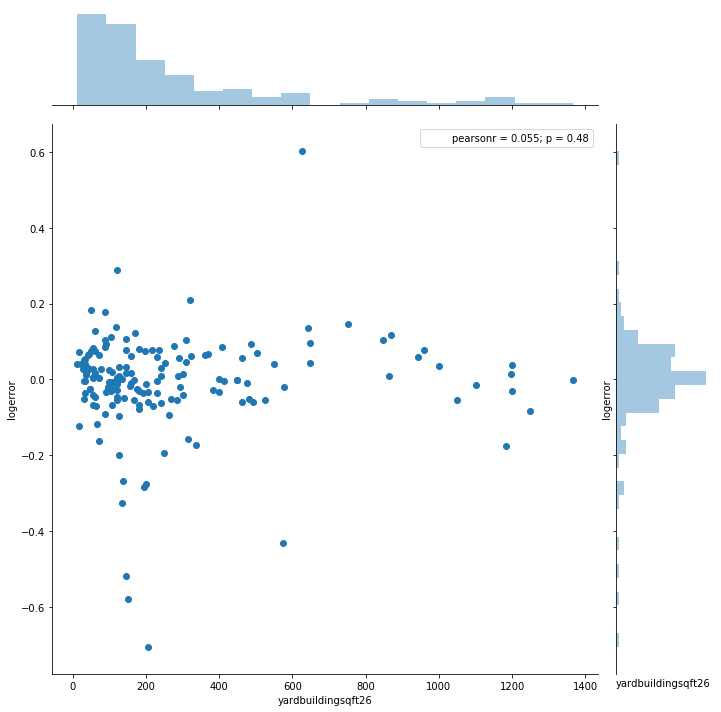

In [146]:
sns.jointplot(x =merged.yardbuildingsqft26,\
              y =merged.logerror,\
              size=10)
plt.xlabel("yardbuildingsqft26")
plt.ylabel("logerror")
plt.show()

- 거의 무의미

## 세금 관련 변수
### taxvaluedollarcnt
- The total tax assessed value of the parcel
- 토지(땅의 구획)의 총 세금 평가 가치

In [184]:
merged['taxvaluedollarcnt'].head()

0    360170.0
1    585529.0
2    119906.0
3    244880.0
4    434551.0
Name: taxvaluedollarcnt, dtype: float64

In [185]:
merged['taxvaluedollarcnt'].shape

(167888,)

In [186]:
# MV count
merged['taxvaluedollarcnt'].isnull().sum()

36

In [187]:
# not MV count
merged['taxvaluedollarcnt'].shape[0] \
- merged['taxvaluedollarcnt'].isnull().sum()

167852

In [188]:
# MV ratio
merged['taxvaluedollarcnt'].isnull().sum() \
/ merged['taxvaluedollarcnt'].shape[0]

0.00021442866673020109

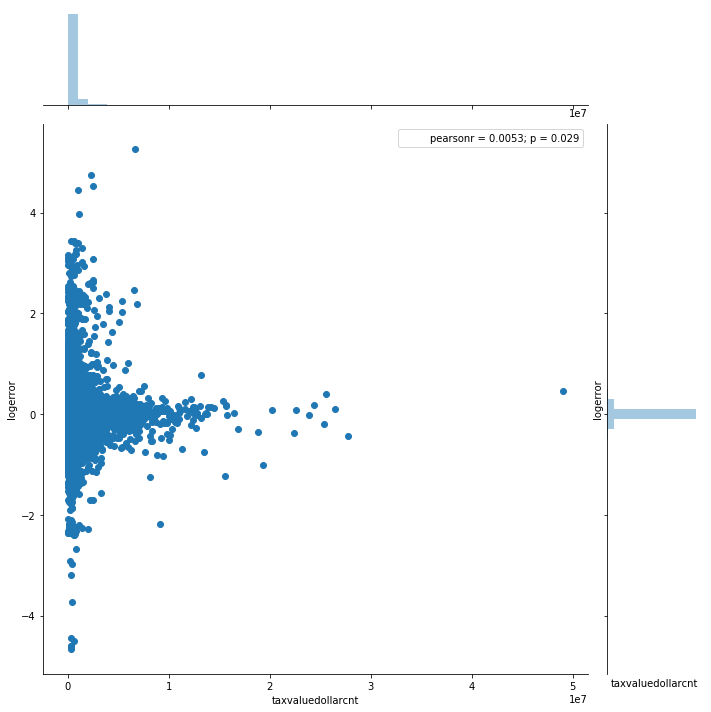

In [189]:
sns.jointplot(x =merged.taxvaluedollarcnt,\
              y =merged.logerror,\
              size=10)
plt.xlabel("taxvaluedollarcnt")
plt.ylabel("logerror")
plt.show()

- taxvaluedollarcnt가 높을 수록 logerror를 잘 예측하는 상관관계가 있는 듯 하다.
- 하지만 조금 애매한 정도 인듯
- MV ratio는 거의 없을 정도로 낮다.

### structuretaxvaluedollarcnt
- The assessed value of the built structure on the parcel
- 건설된 구조물에 대한 토지(땅의 구획)의 평가 값

In [196]:
merged['structuretaxvaluedollarcnt'].head()

0    122754.0
1    346458.0
2     61994.0
3    171518.0
4    169574.0
Name: structuretaxvaluedollarcnt, dtype: float64

In [197]:
merged['structuretaxvaluedollarcnt'].shape

(167888,)

In [198]:
# MV count
merged['structuretaxvaluedollarcnt'].isnull().sum()

529

In [199]:
# not MV count
merged['structuretaxvaluedollarcnt'].shape[0] \
- merged['structuretaxvaluedollarcnt'].isnull().sum()

167359

In [200]:
# MV ratio
merged['structuretaxvaluedollarcnt'].isnull().sum() \
/ merged['structuretaxvaluedollarcnt'].shape[0]

0.0031509101305632328

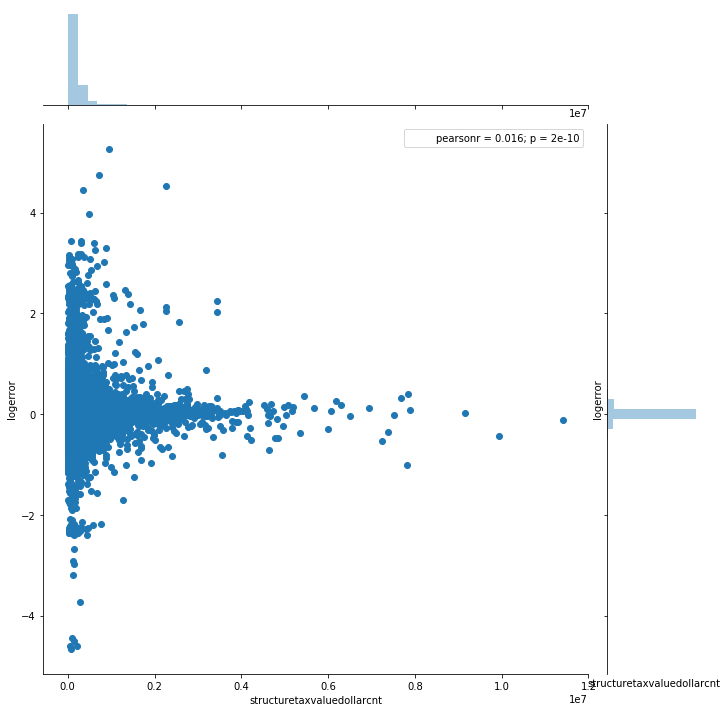

In [201]:
sns.jointplot(x =merged.structuretaxvaluedollarcnt,\
              y =merged.logerror,\
              size=10)
plt.xlabel("structuretaxvaluedollarcnt")
plt.ylabel("logerror")
plt.show()

- structuretaxvaluedollarcnt가 클수록 error를 잘 예측. 
- MV ratio 도 약 0.3으로 거의 없어 매우 신뢰할 수 있을 만한 유의미한 피처

### landtaxvaluedollarcnt
- The assessed value of the land area of the parcel
- 토지(땅의 구획)의 토지 면적에 대한 평가 값

In [202]:
merged['landtaxvaluedollarcnt'].head()

0    237416.0
1    239071.0
2     57912.0
3     73362.0
4    264977.0
Name: landtaxvaluedollarcnt, dtype: float64

In [203]:
merged['landtaxvaluedollarcnt'].shape

(167888,)

In [204]:
# MV count
merged['landtaxvaluedollarcnt'].isnull().sum()

37

In [205]:
# not MV count
merged['landtaxvaluedollarcnt'].shape[0] \
- merged['landtaxvaluedollarcnt'].isnull().sum()

167851

In [206]:
# MV ratio
merged['landtaxvaluedollarcnt'].isnull().sum() \
/ merged['landtaxvaluedollarcnt'].shape[0]

0.00022038501858381778

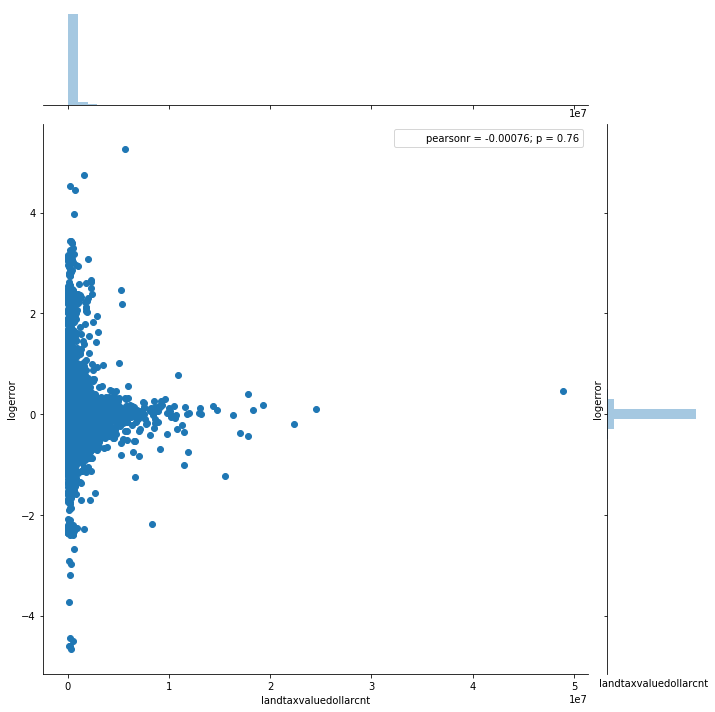

In [207]:
sns.jointplot(x =merged.landtaxvaluedollarcnt,\
              y =merged.logerror,\
              size=10)
plt.xlabel("landtaxvaluedollarcnt")
plt.ylabel("logerror")
plt.show()

- 상관관계가 있긴 하지만 error를 예측하는데 큰 영향을 주는 것 같지는 한다.
- 그래도 아예 무시할 수 는 없을 듯
- MV 갯수는 37로 매우 적음

### taxamount
- The total property tax assessed for that assessment year
- 해당 과세 연도에 대해 평가된 총 재산세

In [208]:
merged['taxamount'].head()

0     6735.88
1    10153.02
2    11484.48
3     3048.74
4     5488.96
Name: taxamount, dtype: float64

In [209]:
merged['taxamount'].shape

(167888,)

In [210]:
# MV count
merged['taxamount'].isnull().sum()

45

In [211]:
# not MV count
merged['taxamount'].shape[0] \
- merged['taxamount'].isnull().sum()

167843

In [212]:
# MV ratio
merged['taxamount'].isnull().sum() \
/ merged['taxamount'].shape[0]

0.00026803583341275137

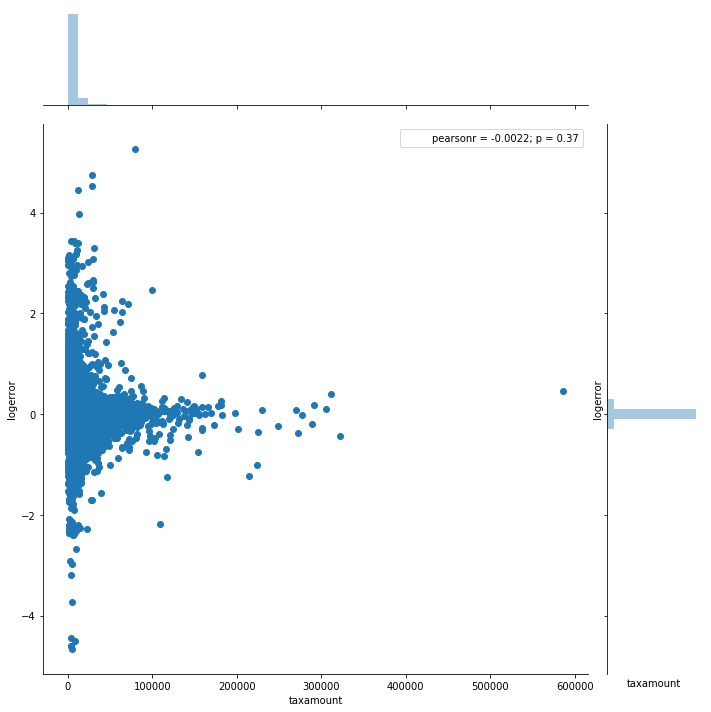

In [213]:
sns.jointplot(x =merged.taxamount,\
              y =merged.logerror,\
              size=10)
plt.xlabel("taxamount")
plt.ylabel("logerror")
plt.show()

- error를 잘 예측하는데 꽤나 상관관계가 있어보이긴 그렇다고 또 엄청 결정적이지도 않아서 애매 
- MV 갯수는 45로 매우 적음

### ~~assessmentyear~~
- The year of the property tax assessment
- 재산세 평가 년도

In [220]:
merged['assessmentyear'].head()

0    2015.0
1    2015.0
2    2015.0
3    2015.0
4    2015.0
Name: assessmentyear, dtype: float64

In [227]:
merged['assessmentyear'].value_counts()

2015.0    90275
2016.0    77579
Name: assessmentyear, dtype: int64

In [228]:
merged['assessmentyear'].shape

(167888,)

In [229]:
# MV count
merged['assessmentyear'].isnull().sum()

34

In [230]:
# not MV count
merged['assessmentyear'].shape[0] \
- merged['assessmentyear'].isnull().sum()

167854

In [231]:
# MV ratio
merged['assessmentyear'].isnull().sum() \
/ merged['assessmentyear'].shape[0]

0.00020251596302296769

- MV 갯수는 34로 매우 적긴하지만 범주형 변주라 일단 skip

### ~~taxdelinquencyflag~~
- Property taxes for this parcel are past due as of 2015
- 2015 년까지 만기되는 토지(땅의 구획)의 재산세

In [235]:
merged['taxdelinquencyflag'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: taxdelinquencyflag, dtype: object

In [236]:
merged['taxdelinquencyflag'].shape

(167888,)

In [237]:
# MV count
merged['taxdelinquencyflag'].isnull().sum()

163205

In [238]:
# not MV count
merged['taxdelinquencyflag'].shape[0] \
- merged['taxdelinquencyflag'].isnull().sum()

4683

In [239]:
# MV ratio
merged['taxdelinquencyflag'].isnull().sum() \
/ merged['taxdelinquencyflag'].shape[0]

0.972106404269513

TypeError: can't multiply sequence by non-int of type 'float'

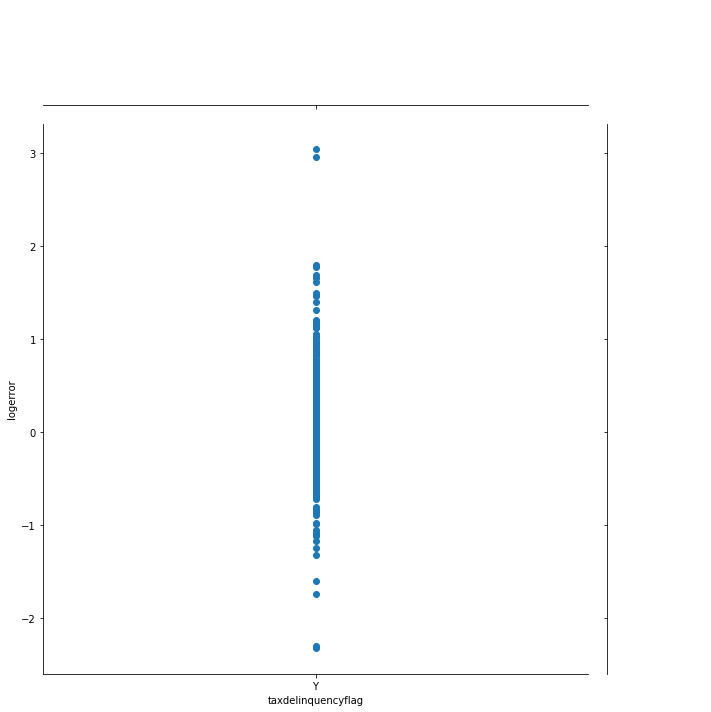

In [241]:
sns.jointplot(x =merged.taxdelinquencyflag,\
              y =merged.logerror,\
              size=10)
plt.xlabel("taxdelinquencyflag")
plt.ylabel("logerror")
plt.show()

In [251]:
merged['taxdelinquencyflag'].value_counts()

Y    4683
Name: taxdelinquencyflag, dtype: int64

### ~~taxdelinquencyyear~~
- Year for which the unpaid propert taxes were due
- 미납 된 재산세 납부시기

In [242]:
merged['taxdelinquencyyear'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: taxdelinquencyyear, dtype: float64

In [245]:
merged['taxdelinquencyyear'].value_counts()

15.0    2078
14.0    1429
13.0     397
12.0     267
11.0     183
10.0     155
9.0      110
8.0       38
7.0       18
6.0        4
99.0       2
4.0        1
3.0        1
Name: taxdelinquencyyear, dtype: int64

In [246]:
merged['taxdelinquencyyear'].shape

(167888,)

In [247]:
# MV count
merged['taxdelinquencyyear'].isnull().sum()

163205

In [248]:
# not MV count
merged['taxdelinquencyyear'].shape[0] \
- merged['taxdelinquencyyear'].isnull().sum()

4683

In [249]:
# MV ratio
merged['taxdelinquencyyear'].isnull().sum() \
/ merged['taxdelinquencyyear'].shape[0]

0.972106404269513

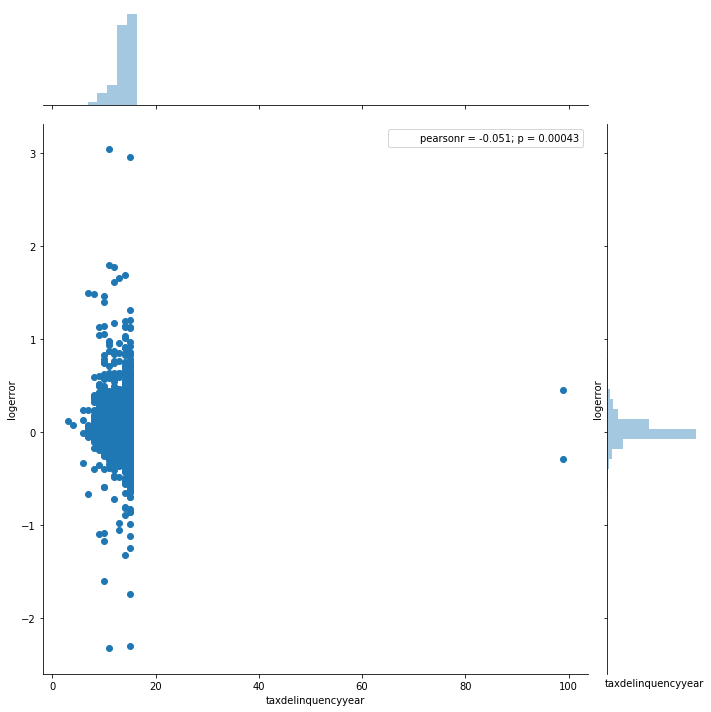

In [250]:
sns.jointplot(x =merged.taxdelinquencyyear,\
              y =merged.logerror,\
              size=10)
plt.xlabel("taxdelinquencyyear")
plt.ylabel("logerror")
plt.show()

- MV는 적지만 범주형 변수
- 다른 방법으로 탐색해보거나 noise로 둬야할 것 같다.